## Salary Predicion Dataset 

Questo progetto si prepone di risolvere il problema della __Salary Predicion__ in versione *Classification*, quindi di raggruppare i dati in due classi:
- _Salary <= 50k_ Per le persone il cui slario è predetto inferiore a 50k
- _Salary > 50k_ Per l'inverso;

Iniziamo aprendo il dataset dal folder apposito e leggendolo con _pandas_

In [1]:
import pandas as pd
import os

os.chdir("dataset")
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Exploration
Cominciamo vedendo in che stato versa il Dataset cosicchè si possa capire che tipo di operazioni vanno svolte 

In [ ]:
df.columns

In [ ]:
df.info()

Si può notare che tra i tipi delle colonne ci sono principalmente valori _object_, sicuramente servirà un'operazione di *encoding*

In [ ]:
df.describe()

Strane queste colonne capital-gain e capital-loss, meglio dare un'occhiata più specifica

In [ ]:
df['capital-gain'].value_counts()

In [ ]:
df['capital-gain'].value_counts()

Capital-gain e capital-value essere inutili, precisamente, (facendo i conti una sola volta perché il numero di 0 nelle due colonne è lo stesso) si può dire che su 32561 tuple 29849 sono 0.
Infatti impostando la semplice proporzione 
$$
100:32561=X:29849 \implies X = \frac{29849*100}{32561} = 91.6%    
$$  
Capiamo che addirittura il _*91.6%*_ dei valori all'interno di queste due colonne è 0, questo è abbastanza per rimuovere entrambe le colonne per rendere il dataset più semplice.


Per capire più facilmente quanti siano gli zeri a confronto dei valori accettabili ecco anche una rappresentazione grafica, ma prima un leggero setup di plt per avere dei grafici più carini

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams.update({
    'figure.facecolor': '#1d2021',
    'axes.facecolor': '#201d16',
    'axes.edgecolor': '#ebdbb2',
    'axes.labelcolor': '#ebdbb2',
    'xtick.color': '#ebdbb2',
    'ytick.color': '#ebdbb2',
    'text.color': '#ebdbb2',
    'axes.titlecolor': '#ebdbb2',
    'grid.color': '#3c3836',
})

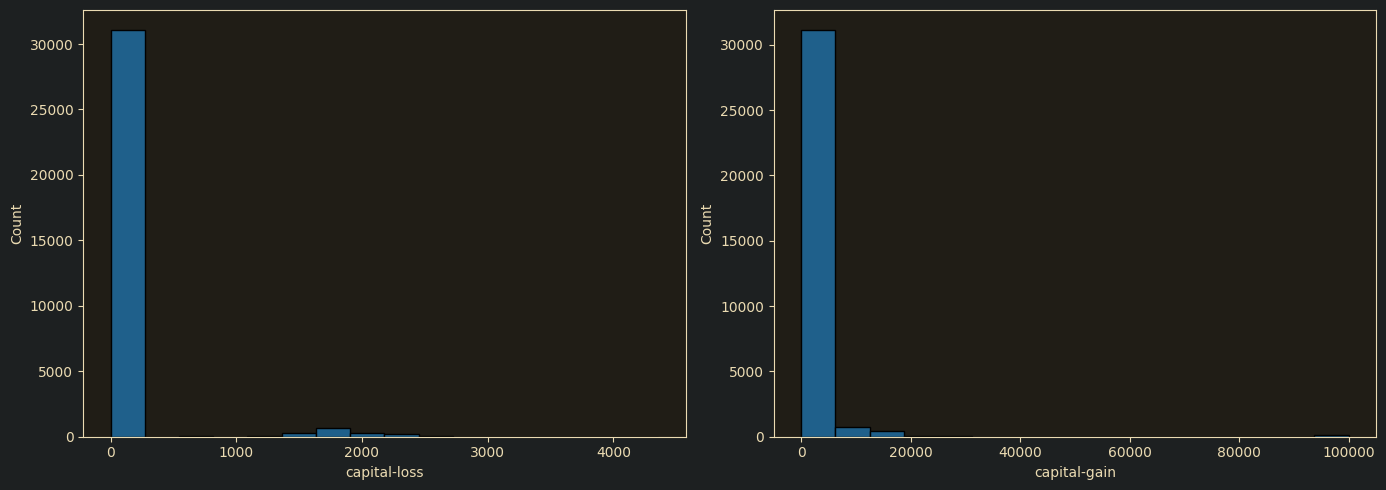

In [3]:
plt.figure(figsize=(14, 5)) 
plt.subplot(1, 2, 1)
sns.histplot(df["capital-loss"])

plt.subplot(1, 2, 2)
sns.histplot(df["capital-gain"], kde=False)

plt.tight_layout()
plt.show()

In [ ]:
df.isnull().all()

In [ ]:
for col in df.columns:
    print(f"\nColonna: {col}")
    print(df[col].value_counts())

Tramite l'output di questi ultimi metodi è possibile accorgersi che non sono presenti valori _null_, ma sono presenti molti _missing values_ marchiati con il carattere _?_ nelle colonne:
- WorkClass
- Occupation
- Native Coutry

Oltretutto è possibile anche notare che la colonna _education_ ed *education_num* sono la stessa colonna ma numerica, visto che verrà eseguito l'_encoding_ anche la colonna *encoding_num* è inutile.

Infine anche la colonna fnlwgt (Final Weight) è inutile perché rappresenta un peso usato nell'analisi demografica dei sondaggi che, nel contesto della classificazione è completamente inutile. 

Un grafico utile è il boxplot delle colonne non a classi perché sono gli unici che possono presentare veri outlier.

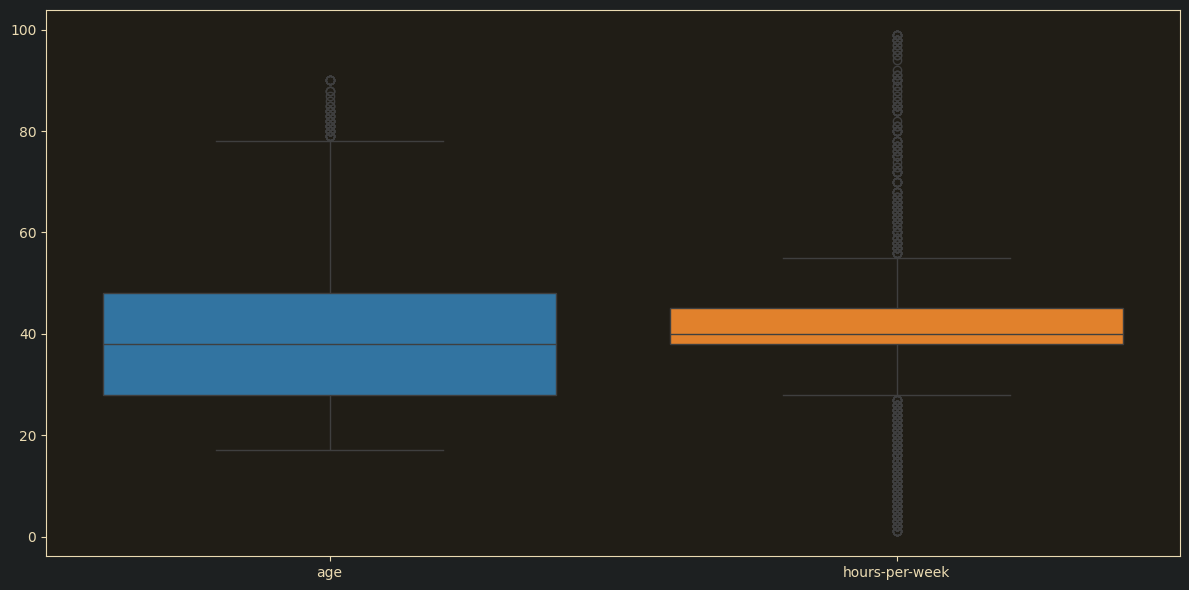

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(df[["age","hours-per-week"]])
plt.tight_layout()
plt.show()

Ci sono dei valori lontani, ma non irrelistici quindi _non serve pulire gli outlier_ 

## Preprocessing
Cominciamo dalla rimozione delle colonne che erano risultate inutili dalla Data Exploration

In [5]:
df.drop(["capital-gain", "capital-loss","education-num","fnlwgt"], axis=1, inplace=True)


In [9]:
df.drop_duplicates(inplace=True)

Prima di darci all'encoding rendo più facile le operazioni trasformando i _missing values ' ?'_ in _np.nan_ 

In [10]:
import numpy as np
df.replace(to_replace=" ?",value=np.nan,inplace=True)

Trasformiamo i _missing values_ nel valore più comune.

In [11]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df)

array([[39, ' State-gov', ' Bachelors', ..., 40, ' United-States',
        ' <=50K'],
       [50, ' Self-emp-not-inc', ' Bachelors', ..., 13, ' United-States',
        ' <=50K'],
       [38, ' Private', ' HS-grad', ..., 40, ' United-States', ' <=50K'],
       ...,
       [27, ' Private', ' Assoc-acdm', ..., 38, ' United-States',
        ' <=50K'],
       [58, ' Private', ' HS-grad', ..., 40, ' United-States', ' <=50K'],
       [52, ' Self-emp-inc', ' HS-grad', ..., 40, ' United-States',
        ' >50K']], shape=(28318, 11), dtype=object)

Adesso il problema dei _missing values_ è risolto! Si può passare all'_encoding_. 

In [12]:
columns = df.select_dtypes(include="object").columns
print(columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse_output=False)

for column in columns:
    df[column] = encoder.fit_transform(df[[column]])


Infine per uniformità dei dati eseguiamo il casting dell'intero contenuto del _Data Frame_ a _float_

In [14]:
df = df.astype(float)